In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import sys
sys.path.append('/home/diego/Trabajo/Proyectos/Pynterpred_devel/')
import numpy as np
import quaternion
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pynterpred as pnt




In [3]:
receptor=pnt.receptor('testsystems/Barnase-Barstar/pdbs/Barnase.pdb','amber14-all.xml',pH=7.0)
ligand  =pnt.ligand('testsystems/Barnase-Barstar/pdbs/Barstar.pdb','amber14-all.xml',pH=7.0)

In [6]:
dist_rec =pnt.utils.dist_furthest_atom_surface(receptor)
dist_lig =pnt.utils.dist_furthest_atom_surface(ligand)

In [7]:
region=pnt.Region(region="sphere", distribution="regular_cartesian", rmax=dist_rec+dist_lig+0.3, num_centers=10000
                 ,qregion="All",qdistribution='healpix',nside=8)

<IPython.core.display.Javascript object>


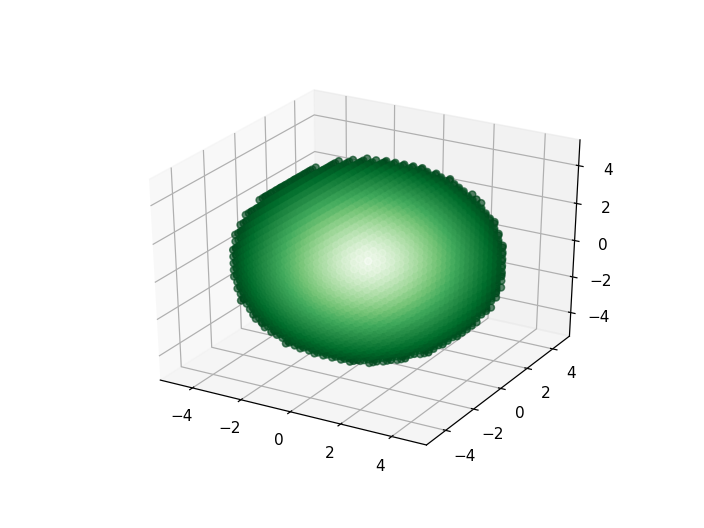

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(region.centers[:,0],region.centers[:,1],region.centers[:,2],c=region.dists,cmap='Greens')

<IPython.core.display.Javascript object>


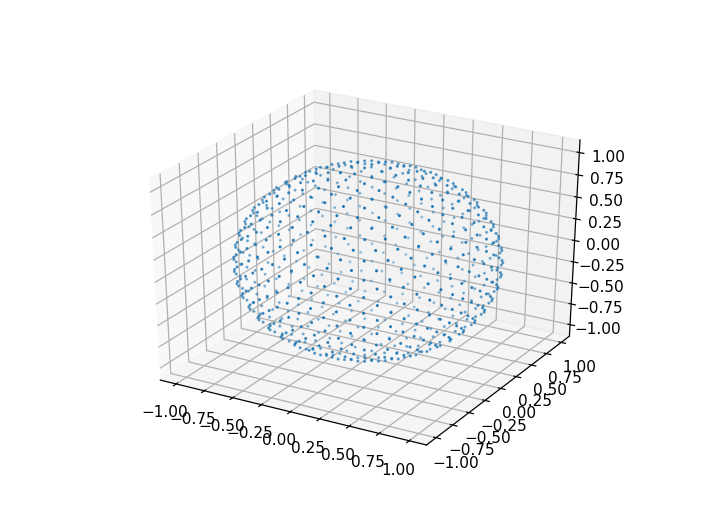

In [9]:
vectores_rot=quaternion.rotate_vectors(region.qrotors,(0.0,0.0,1.0))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectores_rot[:,0],vectores_rot[:,1],vectores_rot[:,2],s=1.0)

In [10]:
region.num_rotors

768

In [11]:
len(region.centers)

9939

In [12]:
9939*768

7633152